# Data Exploration and Visualisation:

## 120 years of Olympic history: athletes and results 🏅

[Data Source](https://www.kaggle.com/marcogdepinto/let-s-discover-more-about-the-olympic-games/notebook)

## STEP 1. Importing the modules


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## STEP 2. Data Importing


In [ ]:
#Import data

## STEP 3. Exploring the properties of the two dataset


In [ ]:
#check the data for NaN by visualize missing values as a matrix


In [ ]:
#Heatmap of missing data
#A value near -1 means if one variable appears then the other variable is very likely to be missing.
#A value near 0 means there is no dependence between the occurrence of missing values of two variables.
#A value near 1 means if one variable appears then the other variable is very likely to be present.

msno.heatmap(data)

Heatmap shows the correlation of missingness between every 2 columns.

In our example, the correlation between Height and Weight is close to 1 which means if one of them is present then the other one must be present.

## STEP 4. Joining the dataframes

In [ ]:
#join the two tables based on the unique identify NOC - Name of Country
merged = pd.merge(data, regions, on='NOC', how='left')
merged.head()


In [ ]:
#saving this to a cvs in your google drive
merged.to_csv('merged.csv', index=False)
!cp merged.csv (path)

## STEP 5. Data Analysis, subsetting, formatting, and visualizing

### 5.1. Height and Weight

In [ ]:
plt.figure(figsize=(12, 10))
ax = sns.scatterplot(x="Height", y="Weight", data=merged)
plt.title('Height vs Weight of Olympic Medalists')

### Using Ploty Express Library

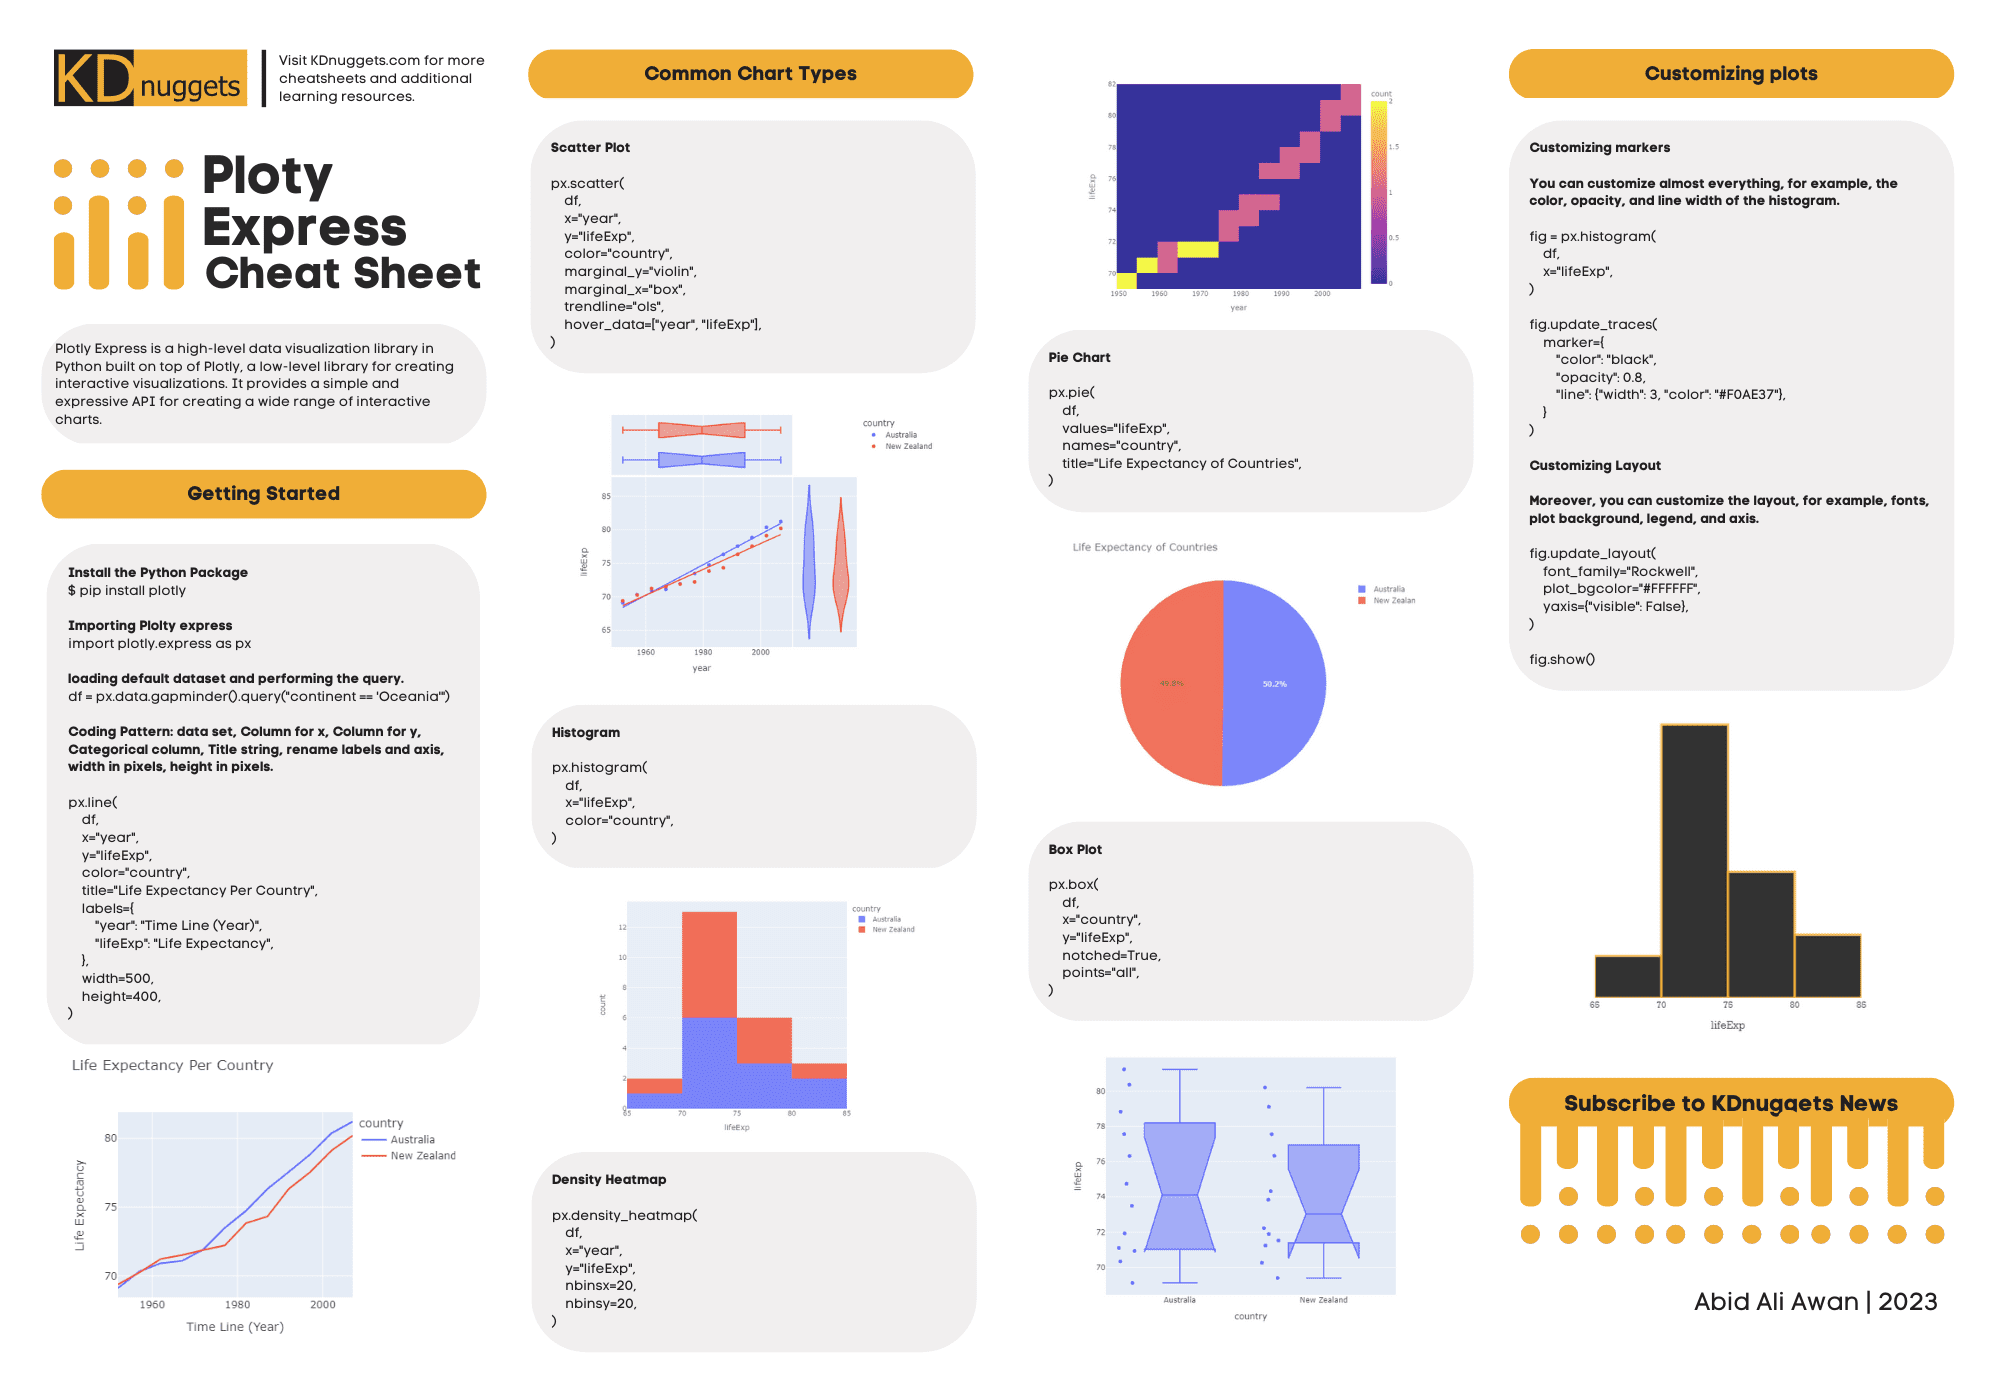

In [ ]:
import plotly.express as px
px.scatter(data_frame=merged, x="Height", y="Weight")

In [ ]:
px.scatter(data_frame=merged, x="Height", y="Weight", color='Sport')

The vast majority of the samples show a linear relation between height and weight (the more the weight, the more the height).

### 5.2. Distribution of the age of gold medalists



In [ ]:
#start by creating a dataframe of only the gold medalists

In [ ]:
#Before plotting we need to deal with those NaNs

In [ ]:
px.histogram(goldMedals, x='Age',color_discrete_sequence=['blue'], opacity=0.8, title='Distribution of Gold Medals')

In [ ]:
fig = px.colors.qualitative.swatches()
fig.show()

In [ ]:
px.histogram(goldMedals, x='Age', color = 'Age')

There are people over the age of 50 who have won a gold medal: Let's know more about those people!



In [ ]:
goldMedals['ID'][goldMedals['Age'] > 50].count()

In [ ]:
masterDisciplines = goldMedals['Sport'][goldMedals['Age'] > 50]

In [ ]:
fig = px.histogram(masterDisciplines, x='Sport', title='Age')
fig.show()

### Medals by Country

In [ ]:
#do the same but for the number of medals by country

In [ ]:
#save this to a csv goldmedals.csv

### Disciplines with the greatest number of Gold Medals for the USA

## Do it yourself now!

**TASK 1: Let's use the data to find out how many medals have been won by female athletes.**

Start by filtering the dataset by Sex == F and then create time series of medals won by females. What other patterns can you find in the data relating to female atheltes?

**TASK 2: Try answer some of these questions:**
* How the number of athletes/countries varied along time?
* How the proportion of Men/Women varied with time?
* How about mean age, weight and height along time ? Can you do this assessment for females and males?



# Solutions

### Gold Medals won by Females

In [ ]:
import plotly.express as px
womenInOlympics = goldMedals[(goldMedals.Sex == 'F') & (goldMedals.Season == 'Summer')]
womenInOlympics.head(10)

In [ ]:
px.histogram(womenInOlympics, x='Year')

In [ ]:
womenInOlympics.loc[womenInOlympics['Year'] == 1940].head(10)

In [ ]:
womenInOlympics['ID'].loc[womenInOlympics['Year'] == 1940].count()

In [ ]:
womenInOlympics['ID'].loc[womenInOlympics['Year'] == 1900].count()

### Medals per country

In [ ]:
goldMedals.region.value_counts().reset_index(name='Medal').head(5)

In [ ]:
totalGoldMedals = goldMedals.region.value_counts().reset_index(name='Medal').head(10)

In [ ]:
px.bar(totalGoldMedals, x='index', y='Medal')

In [ ]:
fig =px.bar(totalGoldMedals, x='index', y='Medal')
fig.write_html('/content/drive/MyDrive/medals.html')

### Evolution of the Olympics over time: Time Series Analysis

Variation of age along time

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [ ]:
#Import from Data Folder in Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = "/content/drive/MyDrive/2022/iX Winter 2022 Data Analytics/Free Trial/Data/athlete_events.csv"
data = pd.read_csv(path)
path = "/content/drive/MyDrive/2022/iX Winter 2022 Data Analytics/Free Trial/Data/noc_regions.csv"
regions = pd.read_csv(path)

In [ ]:
# Import data using datetime and set index to datetime
df = pd.read_csv(file_path, parse_dates=['Year'])

In [ ]:
#join the two tables based on the unique identify NOC - Name of Country
merged = pd.merge(data, regions, on='NOC', how='left')
merged.head()

In [ ]:
MenOverTime = merged[(merged.Sex == 'M') & (merged.Season == 'Summer')]
WomenOverTime = merged[(merged.Sex == 'F') & (merged.Season == 'Summer')]

In [ ]:
px.box(MenOverTime, 'Year', 'Age')

In [ ]:
px.box(WomenOverTime, 'Year', 'Age')

Variation of weight along time

In [ ]:
MenOverTime

In [ ]:
px.line(MenOverTime, x='Year', y='Weight')

In [ ]:
sns.pointplot('Year', 'Weight', data=MenOverTime)

In [ ]:
from datetime import datetime
MenOverTime['Year'] = pd.to_datetime(MenOverTime['Year'])

Variation of male/female athletes over time (Summer Games)

In [ ]:
part = MenOverTime.groupby('Year')['Sex'].value_counts()

In [ ]:
px.line(part,x='Year',y='Sex')